In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout;
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data();

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
y_train=y_train.reshape(y_train.shape[0],)
y_test =y_test.reshape(y_test.shape[0])

In [ ]:
x_train=x_train/255.0;
x_test = x_test/255.0;
K=len(set(y_train))

In [ ]:
def get_model(input_shape,output_shape):
  i=Input(input_shape);
  x=Conv2D(32,(3,3),padding='same',activation='relu')(i);
  x=MaxPooling2D((2,2))(x);
  x=Conv2D(64,(3,3),padding='same',activation='relu')(x);
  x=MaxPooling2D((2,2))(x);
  x=Conv2D(128,(3,3),padding='same',activation='relu')(x);
  x=MaxPooling2D((2,2))(x);
  x=Flatten()(x);
  x=Dense(128,activation='relu')(x);
  x=Dense(output_shape,activation='softmax')(x);
  model=tf.keras.Model(i,x);
  return model;

In [ ]:
def plot_accuracy_and_loss(out):
  plt.figure(figsize=(12,4));
  plt.subplot(1,2,1);
  plt.plot(out.history['accuracy'],label='Train Accuracy');
  plt.plot(out.history['val_accuracy'],label='Test Accuracy');
  plt.legend();
  plt.subplot(1,2,2);
  plt.plot(out.history['loss'],label='Train Loss');
  plt.plot(out.history['val_loss'],label='Test Loss');
  plt.legend();
  plt.show();

Epoch 1/20
1563/1563 [==============================] - 46s 10ms/step - loss: 1.6484 - accuracy: 0.3952 - val_loss: 1.0881 - val_accuracy: 0.6192
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9767 - accuracy: 0.6569 - val_loss: 0.9466 - val_accuracy: 0.6756
Epoch 3/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7846 - accuracy: 0.7267 - val_loss: 0.8459 - val_accuracy: 0.7090
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6636 - accuracy: 0.7697 - val_loss: 0.7946 - val_accuracy: 0.7310
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5751 - accuracy: 0.7974 - val_loss: 0.7978 - val_accuracy: 0.7396
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4896 - accuracy: 0.8270 - val_loss: 0.7871 - val_accuracy: 0.7497
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4157 - accuracy: 0.8522 - val_loss: 0.8361 -

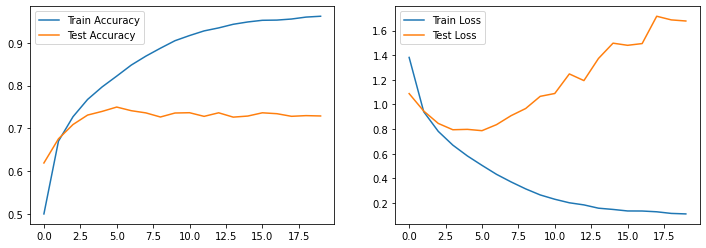

In [ ]:
cnn=get_model(x_train[0].shape,K);
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']);
logs=cnn.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=20);
plot_accuracy_and_loss(logs);

Epoch 1/20
1562/1562 [==============================] - 42s 26ms/step - loss: 1.8388 - accuracy: 0.3149 - val_loss: 1.3909 - val_accuracy: 0.5048
Epoch 2/20
1562/1562 [==============================] - 40s 26ms/step - loss: 1.3409 - accuracy: 0.5198 - val_loss: 1.1033 - val_accuracy: 0.6096
Epoch 3/20
1562/1562 [==============================] - 41s 26ms/step - loss: 1.1541 - accuracy: 0.5893 - val_loss: 0.9481 - val_accuracy: 0.6681
Epoch 4/20
1562/1562 [==============================] - 41s 26ms/step - loss: 1.0480 - accuracy: 0.6267 - val_loss: 0.8666 - val_accuracy: 0.6985
Epoch 5/20
1562/1562 [==============================] - 41s 26ms/step - loss: 0.9872 - accuracy: 0.6502 - val_loss: 0.8825 - val_accuracy: 0.6941
Epoch 6/20
1562/1562 [==============================] - 41s 26ms/step - loss: 0.9300 - accuracy: 0.6716 - val_loss: 0.8387 - val_accuracy: 0.7138
Epoch 7/20
1562/1562 [==============================] - 41s 26ms/step - loss: 0.8854 - accuracy: 0.6875 - val_loss: 0.7918 -

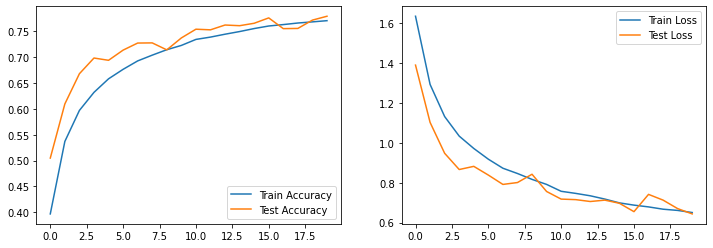

In [ ]:
#Checking with data Augmentation
batch_sz=32;
step=x_train.shape[0]//batch_sz;
datagen=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True);
itr=datagen.flow(x_train,y_train,batch_size=batch_sz);
model=get_model(x_train[0].shape,K);
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']);
out=model.fit(itr,steps_per_epoch=step,epochs=20,validation_data=(x_test,y_test))
plot_accuracy_and_loss(out);

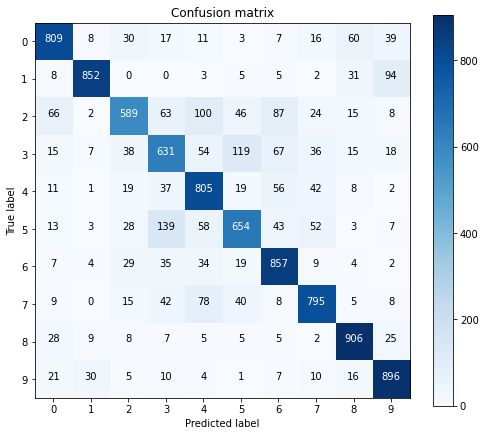

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,num_classes):
  plt.figure(figsize=(7,6))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix");
  plt.colorbar()
  plt.xticks(np.arange(num_classes));
  plt.yticks(np.arange(num_classes));
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], 'd'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black");
  plt.tight_layout();
  plt.ylabel('True label');
  plt.xlabel('Predicted label');
  plt.show()
y_pred=np.argmax(model.predict(x_test),axis=1)
plot_confusion_matrix(confusion_matrix(y_test,y_pred),K);

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

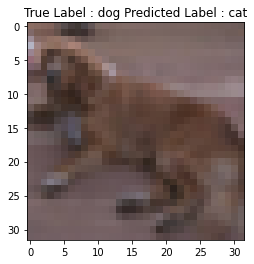

In [ ]:
mismatch_idx=np.where((y_pred==3)&(y_test==5))[0]
i=np.random.choice(mismatch_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True Label : {} Predicted Label : {}".format(labels[y_test[i]],labels[y_pred[i]]))
plt.show()